# Use-Case Guide

## Introduction

In this guide, we will provide an overview of popular evaluation use-cases. See our LangSmith evaluation [introductory video](https://youtu.be/vygFgCNR7WA?feature=shared) for an overview of general concepts.

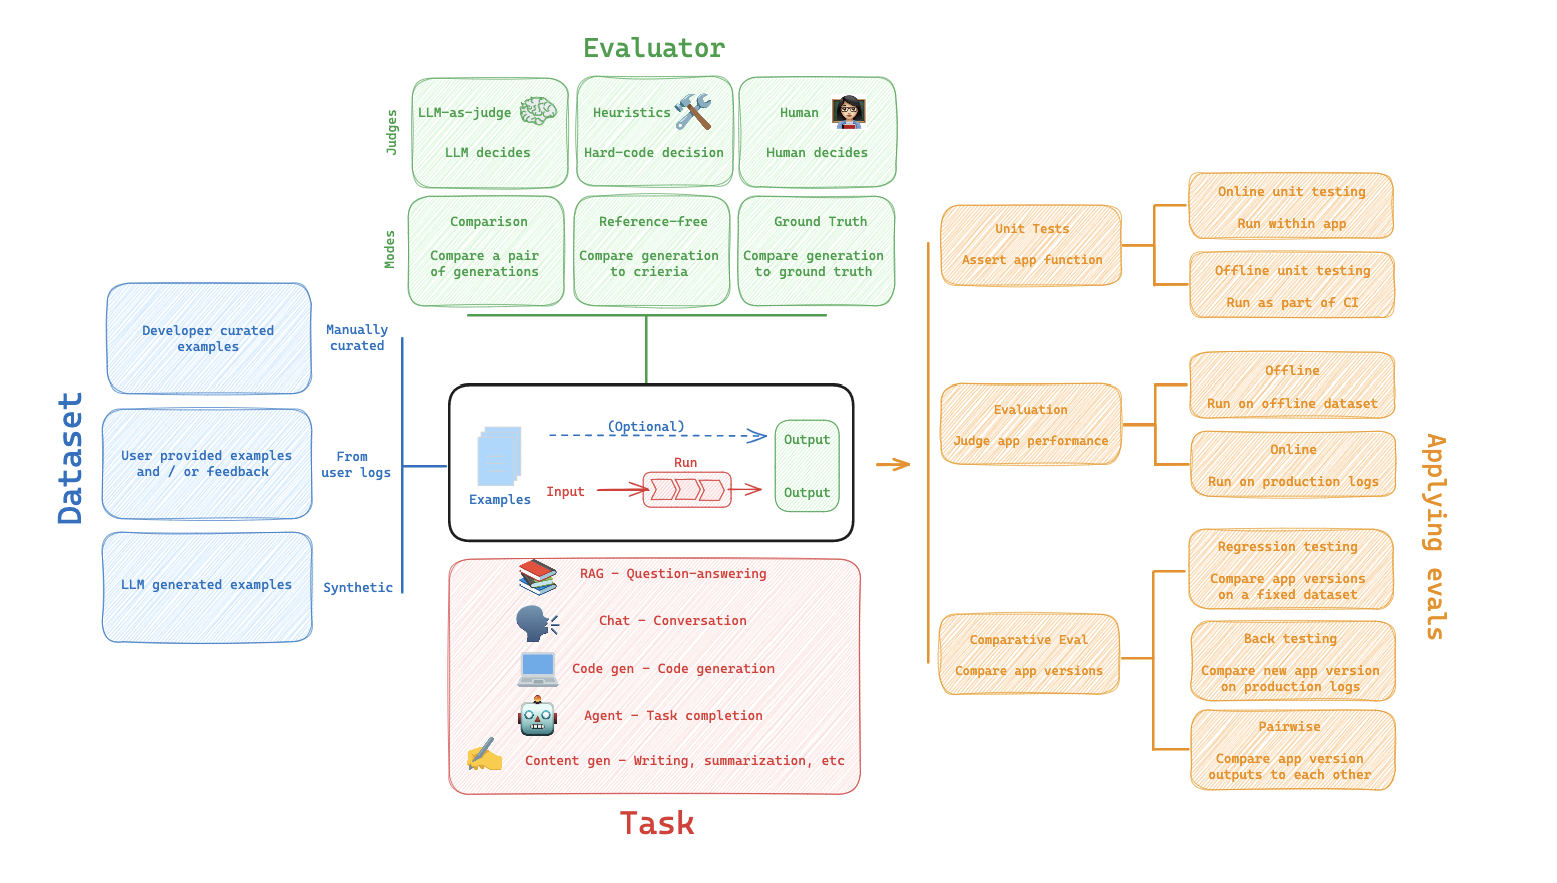

## RAG

### Overview

RAG (retrieval augmented generation) uses an index to retrieve context (documents) related to a user input and pass them to an LLM (see our detailed video series and repo focused on RAG [here](https://github.com/langchain-ai/rag-from-scratch)). RAG evaluation typically employs the following components, which we will review in detail below:

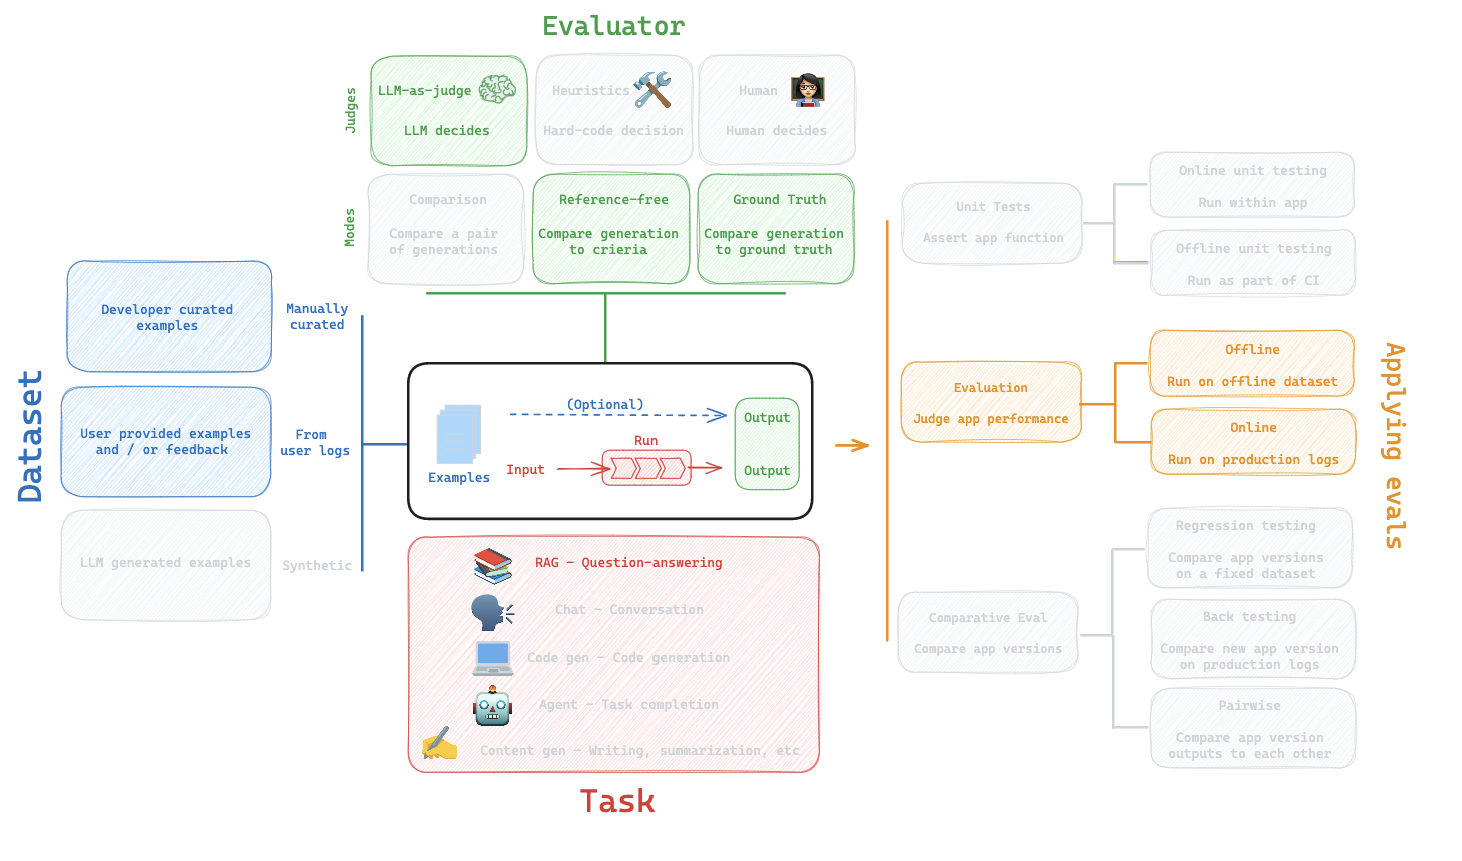

### Dataset

A central consideration for RAG evaluation is whether you have a dataset with `reference` answers or not. If so, `developer curated examples` will include pairs of questions and ground truth reference answers (see a dataset example [here](https://smith.langchain.com/public/730d833b-74da-43e2-a614-4e2ca2502606/d)). However, even without `reference` answers, several different evaluations are possible using any of the `Reference-free` RAG evaluation prompts (see examples below). 

### Evaluator

`LLM-as-judge` is typically used for all RAG evaluations.

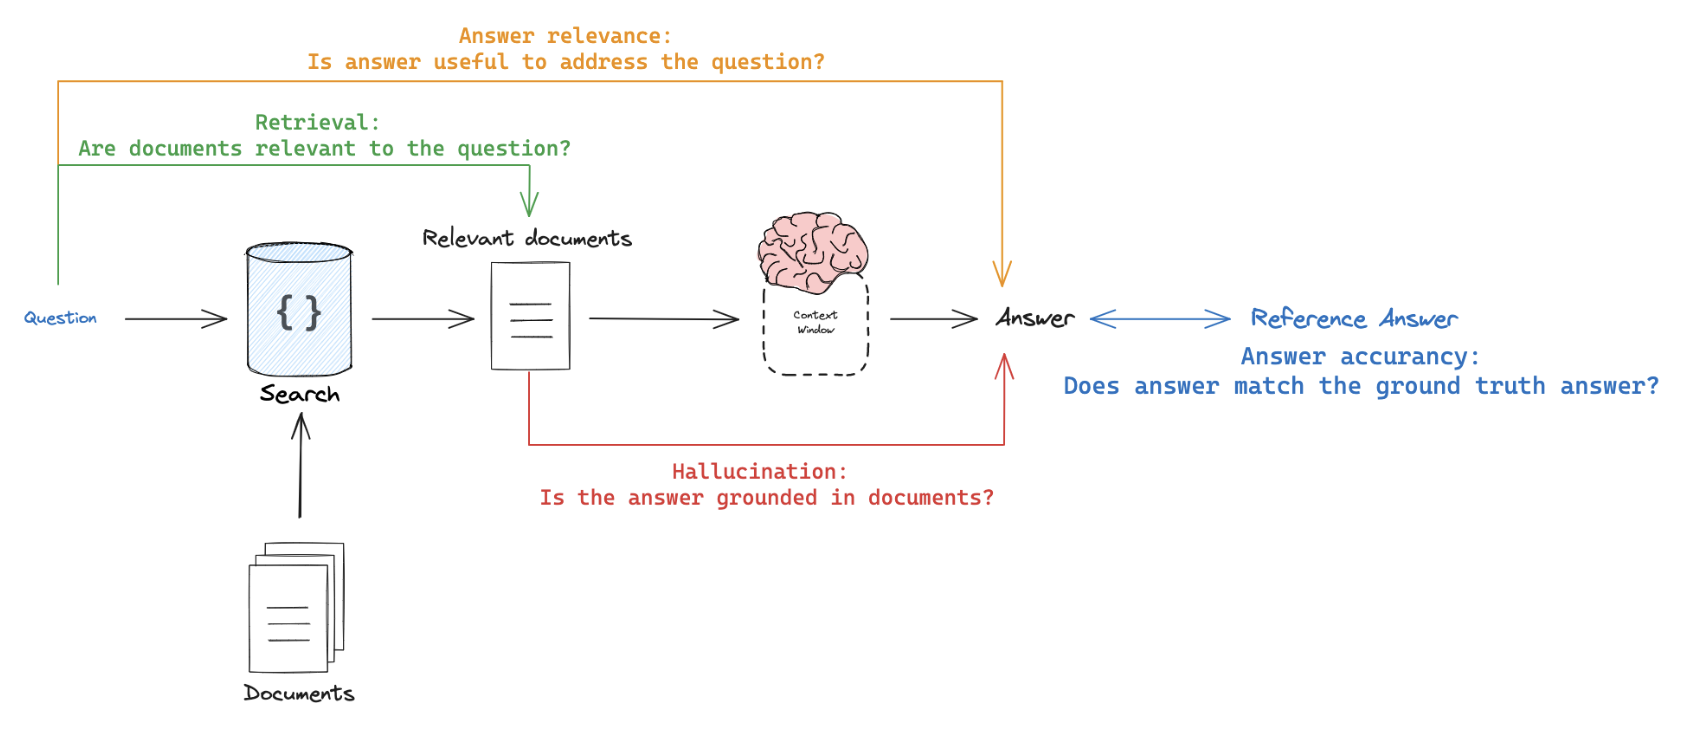

`Ground truth reference` answers can be evaluated relative to the RAG answer using this prompt (blue, in the above figure):

* Prompt: https://smith.langchain.com/hub/langchain-ai/rag-answer-vs-reference
* RAG answer correctness evaluation video: https://youtu.be/lTfhw_9cJqc?feature=shared

`Reference-free` prompts do not require a ground truth answer (orange, green, and red in the above figure):

* Prompt: https://smith.langchain.com/hub/langchain-ai/rag-answer-hallucination
* Prompt: https://smith.langchain.com/hub/langchain-ai/rag-answer-helpfulness
* Prompt: https://smith.langchain.com/hub/langchain-ai/rag-document-relevance
* RAG answer hallucination video: https://youtu.be/IlNglM9bKLw?feature=shared
* RAG document relevance video: https://youtu.be/Fr_7HtHjcf0?feature=shared

### Applying RAG evaluation

`Offline` evaluation is used for any prompts that rely on a `reference`. Most commonly, this is used with RAG answer correctness evaluation where the reference is a ground truth (correct) answer. However, `Online` evaluation can be used for any `reference-free` prompts:

* RAG with online evaluation video: https://youtu.be/O0x6AcImDpM?feature=shared

### Summary

| Use Case                             | Detail                                      | Reference-free? | LLM-as-judge? | Pairwise relevant |
|--------------------------------------|---------------------------------------------|-----------------|---------------|-------------------|
| RAG: retrieved documents precision   | Any retrieved docs irrelevant to question   | Yes             | Yes  | No                |
| RAG: retrieved documents recall      | Retrieved docs address question             | Yes             | Yes   | No                |
| RAG: answer faithfulness             | Answer hallucinations vs retrieved docs     | Yes             | Yes  | No                |
| RAG: answer relevance                | Answer relevant to retrieved docs           | Yes             | Yes | No            |
| RAG: answer helpfulness              | Answer helpful to address question          | Yes             | Yes  | No                |
| RAG: answer correctness              | Is answer correct relative to reference     | No              | Yes  | No                |



## Summarization

### Overview

Summarization is one specific type of free-form writing. The evaluation aim is typically to examine the writing (summary) relative to a set of criteria. Summarization evaluation typically employs the following components, which we will review in detail below:

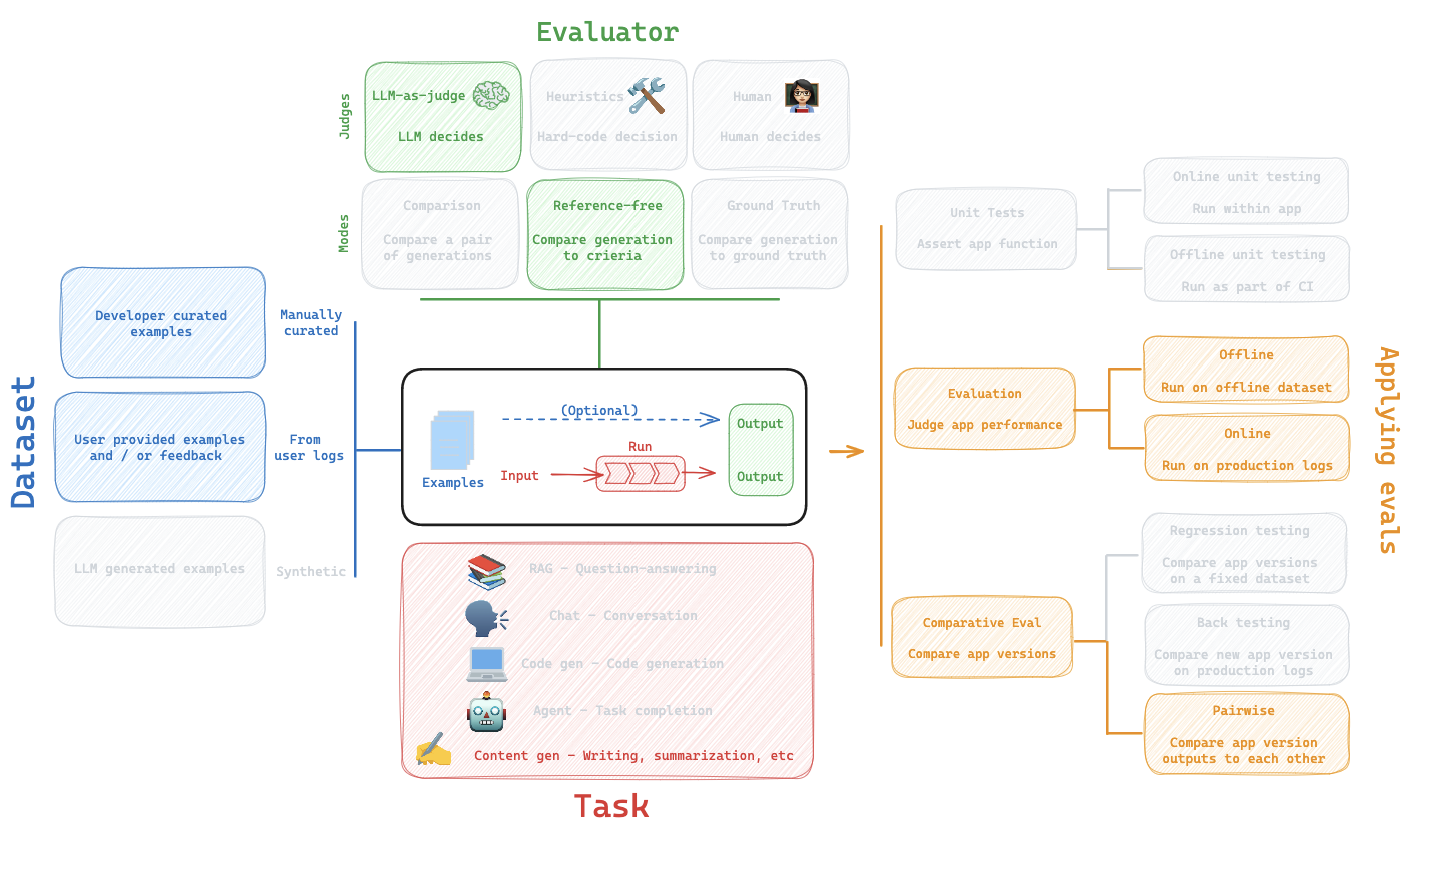

### Dataset

`Developer curated examples` of texts to summarize are commonly used for evaluation. See a dataset example [here](https://smith.langchain.com/public/659b07af-1cab-4e18-b21a-91a69a4c3990/d) focused on academic paper summarization. However, `user logs` from a production summarization app can be used for online evaluation with any of the `Reference-free` summary evaluation prompts below.

### Evaluator

`LLM-as-judge` is typically used for evaluation of summarization (as well as other types of writing). `Reference-free` prompts are common, using general criteria criteria rather than a specific (ground truth) summary:

* Prompt: https://smith.langchain.com/hub/rlm/summary-accurancy-evaluator

### Applying summarization evaluation

`Online` or `Offline` evaluation are feasible because of the `Reference-free` prompt used. `Pairwise` evaluation is also a powerful way to perform comparisons between different summarization chains (e.g., different summarization prompts or LLMs): 
 
* Video on pairwise evaluation: https://youtu.be/yskkOAfTwcQ?feature=shared

### Summary

| Use Case                             | Detail                                      | Reference-free? | LLM-as-judge? | Pairwise relevant |
|--------------------------------------|---------------------------------------------|-----------------|---------------|-------------------|
| Text summarization: Factual accuracy | Is summary consistent w/ source             | Yes             | Yes           | Yes               |
| Text summarization: Faithfulness     | Does summary contain hallucinations         | Yes             | Yes           | Yes               |
| Text summarization: Relevance        | Is summary relevant to source               | Yes             | Yes           | Yes               |
| Text summarization: Helpfulness      | Is summary relevant to task / user need     | Yes             | Yes           | Yes               |
| Text summarization: Insightfulness   | Is summary relevant to task / user need     | Yes             | Yes           | Yes               |


## Classification / Tagging

### Overview

Classification / Tagging applies a label to a given input for use-cases that include toxicity detection, sentiment analysis, etc. Classification / Tagging evaluation typically employs the following components, which we will review in detail below:

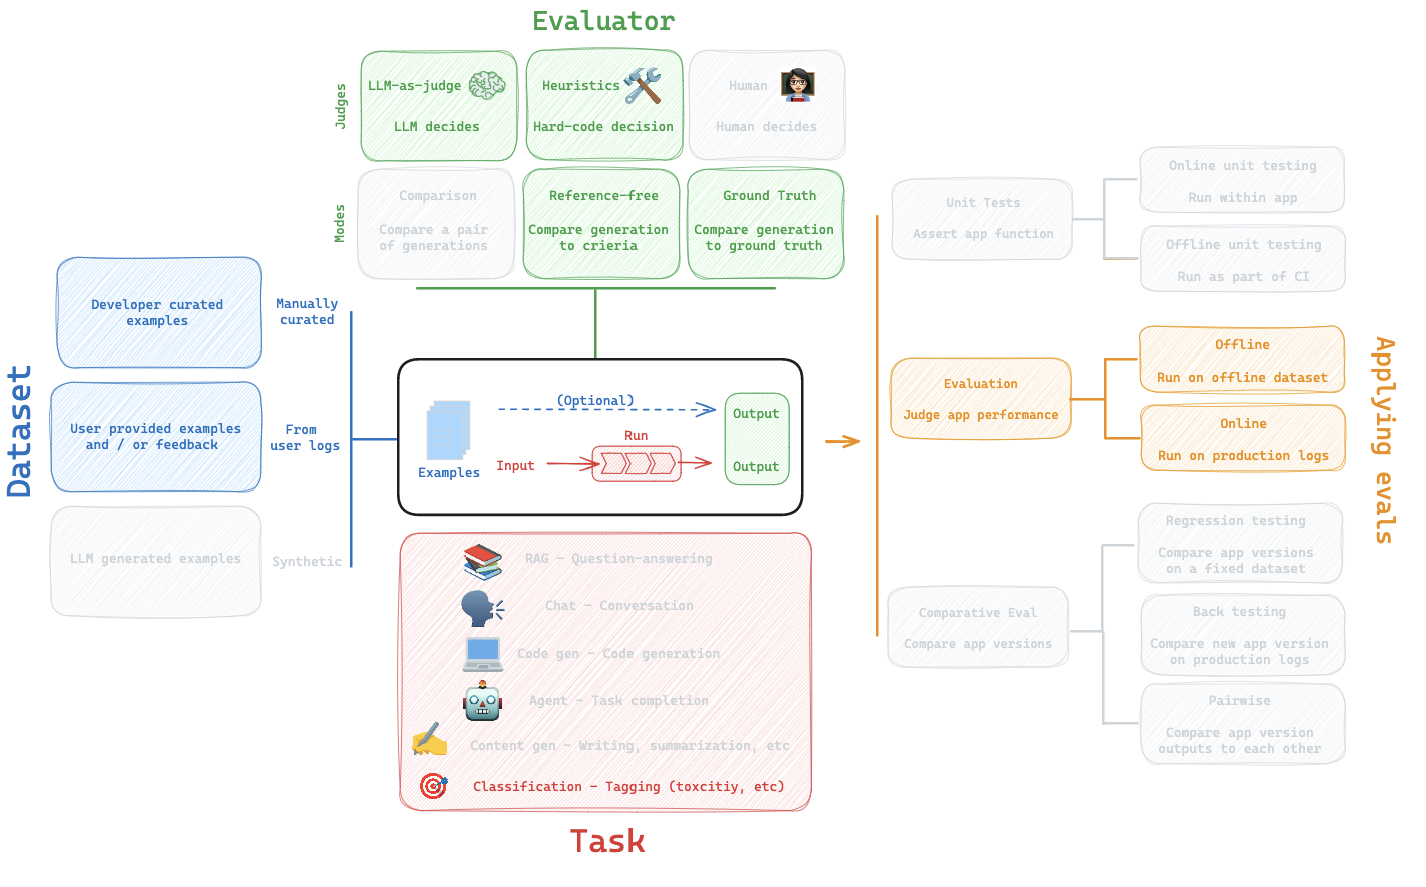

### Dataset

A central consideration for Classification / Tagging evaluation is whether you have a dataset with `reference` labels or not. If not, users frequently want to define an evaluator that uses criteria to apply label (e.g., toxicity, etc) to an input (e.g., text, user-question, etc). If a user provides ground truth class labels, then the evaluation objective is focused on scoring a Classification / Tagging chain relative to the ground truth class label. 

### Evaluator

If ground truth reference labels are provided, then it's common to simply define a [custom heuristic evaluator](https://langsmith-docs-git-rlm-add-rag-and-backtesting-c93262-langchain.vercel.app/how_to_guides/evaluation/evaluate_llm_application#use-custom-evaluators) to compare ground truth labels to the chain output (e.g., via REGEX or similar). However, if groud truth reference is not provided then `LLM-as-judge` is typically to perform the Classification / Tagging of an input based upon specified criteria:

* Prompt: https://smith.langchain.com/hub/rlm/tagging

### Applying classification evaluation

`Online` or `Offline` evaluation is feasible when using `LLM-as-judge` with the `Reference-free` prompt used. In particular, this is well suited to `Online` evaluation when a user wants to tag / classifity application input (e.g., for toxicity, etc).
 
* Online evaluation flow video: https://youtu.be/O0x6AcImDpM?feature=shared

### Summary

| Use Case                             | Detail                             | Reference-free?        | LLM-as-judge? | Pairwise relevant |
|--------------------------------------|------------------------------------|------------------------|---------------|-------------------|
| Classification / tagging: Criteria   | Tag if specific criteria is met    | Yes                    | Yes           | No                |
| Classification / tagging: Accuracy   | Standard definition                | No (ground truth class)| No            | No                |
| Classification / tagging: Precision  | Standard definition                | No (ground truth class)| No            | No                |
| Classification / tagging: Recall     | Standard definition                | No (ground truth class)| No            | No                |
